In [160]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


In [161]:
df =pd.read_csv("laptop_prices.csv")
df.head().T


,0,1,2,3,4
Company,Apple,Apple,HP,Apple,Apple
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3
Ram,8,8,8,16,8
OS,macOS,macOS,No OS,macOS,macOS
Weight,1.37,1.34,1.86,1.83,1.37
Price_euros,1339.69,898.94,575.0,2537.45,1803.6
Screen,Standard,Standard,Full HD,Standard,Standard
ScreenW,2560,1440,1920,2880,2560


In [162]:
df['GPU'] = df['GPU_company'] + ' ' + df['GPU_model']




In [163]:
df.head().T

,0,1,2,3,4
Company,Apple,Apple,HP,Apple,Apple
Product,MacBook Pro,Macbook Air,250 G6,MacBook Pro,MacBook Pro
TypeName,Ultrabook,Ultrabook,Notebook,Ultrabook,Ultrabook
Inches,13.3,13.3,15.6,15.4,13.3
Ram,8,8,8,16,8
OS,macOS,macOS,No OS,macOS,macOS
Weight,1.37,1.34,1.86,1.83,1.37
Price_euros,1339.69,898.94,575.0,2537.45,1803.6
Screen,Standard,Standard,Full HD,Standard,Standard
ScreenW,2560,1440,1920,2880,2560


In [164]:
df.drop(['GPU_company', 'GPU_model'], axis=1, inplace=True)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,IPSpanel,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel Iris Plus Graphics 650


In [165]:
df['PrimaryStorageType'].unique()



array(['SSD', 'Flash Storage', 'HDD', 'Hybrid'], dtype=object)

In [166]:
df.shape

(1275, 22)

In [167]:
df.describe()


,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


### Price: The minimum price is 174.000000 and the maximum price is 6099 While the Average price is 1134.969059  
###  Screen Width: The minimum resolution width is 1366 and the maximum resolution width is 3840.0
### Screen Height: The minimum resolution height is 768.0 and the maximum resolution height is 32160.0
### PrimaryStorage	: The minimum PrimaryStorage	 is 8 and the maximum warranty is 2048

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [169]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU                     0
dtype: int64

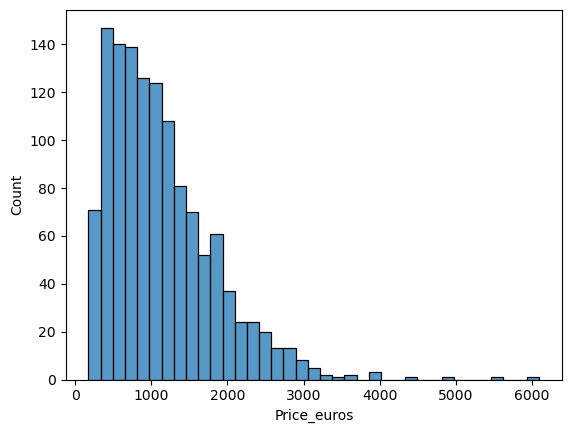

In [170]:
sns.histplot(df['Price_euros'])
plt.show()

# The distribution of the target variable is skewed and it is obvious that commodities with low prices are sold and purchased more than the branded ones.


In [171]:
# Visualising the brands in the dataset
plt = px.histogram(df, x="Company", title="Brand Distribution",
                   color="Company", color_discrete_sequence=px.colors.qualitative.Pastel)
plt.show()

## Top 3 Laptop Brands
## 1. Dell
## 2. HP
## 3. Lenovo

<Axes: xlabel='Company', ylabel='Price_euros'>

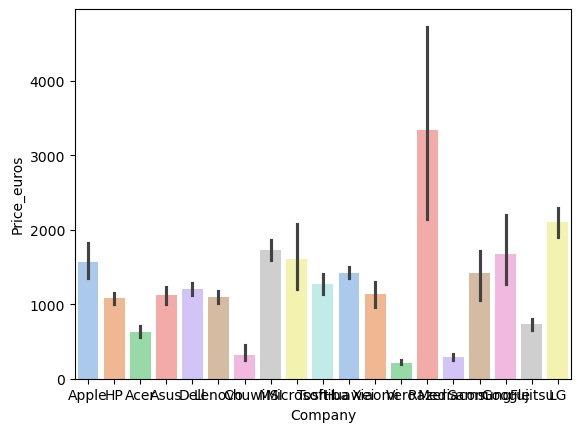

In [172]:
# how does brand name impacts the laptop price
sns.barplot(x=df['Company'], y=df['Price_euros'], hue=df['Company'], palette='pastel', legend=False)


In [173]:
plt = px.histogram(df, x='Ram', color='Ram', title="Ram Distribution", color_discrete_sequence=px.colors.qualitative.Pastel)
plt.show()

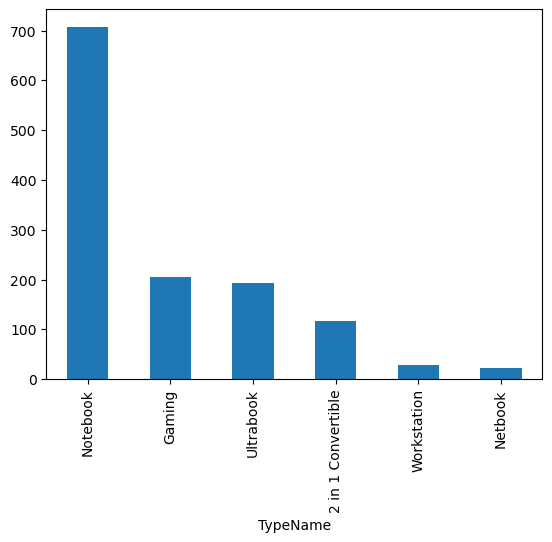

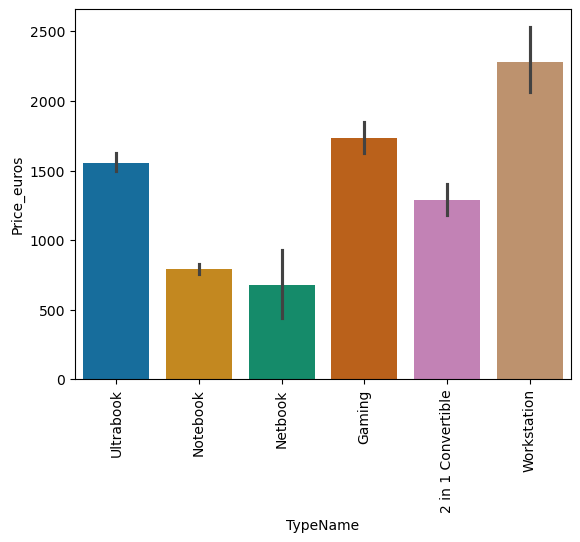

In [174]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of each 'TypeName'
df['TypeName'].value_counts().plot(kind='bar')
plt.xticks(rotation="vertical")  # Rotate x-axis labels for the first plot
plt.show()

# Plot the barplot with 'TypeName' on the x-axis and 'Price_euros' on the y-axis
ax = sns.barplot(x=df['TypeName'], y=df['Price_euros'], hue=df['TypeName'], palette="colorblind", legend=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation="vertical")  # Rotate x-axis labels for the seaborn plot
plt.show()

<Axes: xlabel='Inches', ylabel='Price_euros'>

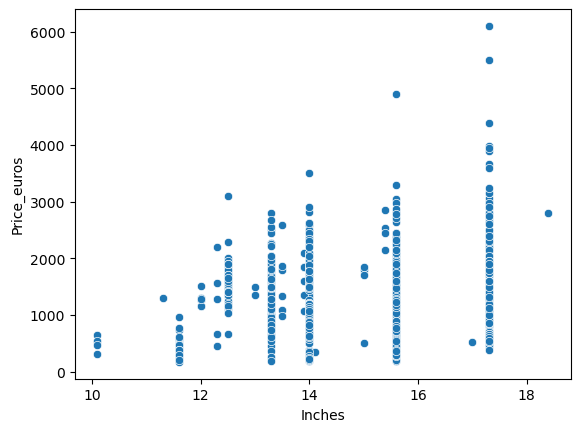

In [175]:
# Does the price vary with laptop size in inches?
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])
# From the below plot we can conclude that there is a relationship but not a strong relationship between the price and size column.

In [176]:

plt = px.histogram(df, x='PrimaryStorageType', color='PrimaryStorageType', title="Primary Storage Type Distribution", color_discrete_sequence=px.colors.qualitative.Pastel)
plt.show()

In [177]:
plt = px.histogram(df, x='GPU', color='GPU', title="GPU Distribution")
plt.show()

# Feature Engineering and Preprocessing of Laptop Price Prediction Model

In [178]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score


In [179]:
df['CPU'] = df['CPU_company'] + ' ' + df['CPU_model']
df.drop(['CPU_company', 'CPU_model'], axis=1, inplace=True)
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,Touchscreen,IPSpanel,RetinaDisplay,CPU_freq,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU,CPU
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,No,Yes,Yes,2.3,128,0,SSD,No,Intel Iris Plus Graphics 640,Intel Core i5
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,No,No,1.8,128,0,Flash Storage,No,Intel HD Graphics 6000,Intel Core i5
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,No,No,2.5,256,0,SSD,No,Intel HD Graphics 620,Intel Core i5 7200U
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,No,Yes,Yes,2.7,512,0,SSD,No,AMD Radeon Pro 455,Intel Core i7
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,No,Yes,Yes,3.1,256,0,SSD,No,Intel Iris Plus Graphics 650,Intel Core i5


In [180]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [181]:
categorical_columns

['Company',
 'Product',
 'TypeName',
 'OS',
 'Screen',
 'Touchscreen',
 'IPSpanel',
 'RetinaDisplay',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU',
 'CPU']

In [182]:
numerical_columns

['Inches',
 'Ram',
 'Weight',
 'Price_euros',
 'ScreenW',
 'ScreenH',
 'CPU_freq',
 'PrimaryStorage',
 'SecondaryStorage']

In [183]:


numerical_columns.remove('Price_euros')  # Exclude the target column from numerical columns
numerical_transformer = StandardScaler()


In [184]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, inverse_func=np.expm1) 

# Apply the log transformation to the 'Price_euros' column
df['Price_euros'] = log_transformer.fit_transform(df[['Price_euros']])

<Axes: xlabel='Price_euros', ylabel='Count'>

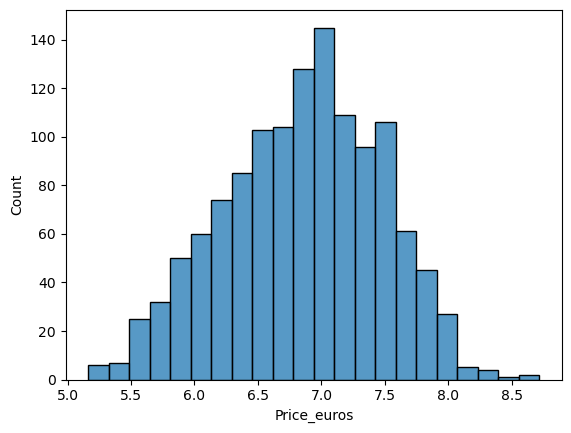

In [185]:
sns.histplot(df['Price_euros'])

In [186]:
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [187]:
X = df.drop(columns=[ 'Price_euros']) 
y = df['Price_euros']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Inches', 'Ram', 'Weight', 'ScreenW',
                                  'ScreenH', 'CPU_freq', 'PrimaryStorage',
                                  'SecondaryStorage']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Company', 'Product', 'TypeName', 'OS',
                                  'Screen', 'Touchscreen', 'IPSpanel',
                                  'RetinaDisplay', 'PrimaryStorageType',
                                  'SecondaryStorageType', 'GPU', 'CPU'])])

In [188]:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [189]:
# Train and save multiple models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "SVR": SVR()
}

best_model = None
best_score = float('-inf')
best_model_name = ""

for name, model in models.items():
    model.fit(preprocessor.transform(X_train), y_train)
    y_pred = model.predict(preprocessor.transform(X_test))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {r2}")
    if r2 > best_score:
        best_score = r2
        best_model = model
        best_model_name = name

# Save the best model
joblib.dump(best_model, 'best_model.pkl')

print(f"Best model: {best_model_name} with R^2 score: {best_score}")

Linear Regression R^2 score: 0.836268361075194
Random Forest R^2 score: 0.8883959351909423
XGBoost R^2 score: 0.9068339303821735
SVR R^2 score: 0.8940232277228948
Best model: XGBoost with R^2 score: 0.9068339303821735


In [190]:
from sklearn.model_selection import RandomizedSearchCV

# Define the models and hyperparameter grids
models = {
    "Linear Regression": (LinearRegression(), {}),
    "Random Forest": (RandomForestRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30, 40, 50]
    }),
    "XGBoost": (XGBRegressor(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
    }),
    "SVR": (SVR(), {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto']
    })
}

best_model = None
best_score = float('-inf')
best_model_name = ""

for name, (model, param_grid) in models.items():
    if param_grid:
        search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=5, scoring='r2', random_state=42, n_jobs=-1)
        search.fit(preprocessor.transform(X_train), y_train)
        best_model_for_name = search.best_estimator_
    else:
        best_model_for_name = model
        best_model_for_name.fit(preprocessor.transform(X_train), y_train)
    
    y_pred = best_model_for_name.predict(preprocessor.transform(X_test))
    r2 = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {r2}")
    if r2 > best_score:
        best_score = r2
        best_model = best_model_for_name
        best_model_name = name

# Save the best model and its name
joblib.dump(best_model, 'hypertuned_best_model.pkl')

print(f"Best model: {best_model_name} with R^2 score: {best_score}")

Linear Regression R^2 score: 0.836268361075194
Random Forest R^2 score: 0.8899405016242219
XGBoost R^2 score: 0.9030218484784958
SVR R^2 score: 0.9002046532445696
Best model: XGBoost with R^2 score: 0.9030218484784958
